<a href="https://colab.research.google.com/github/itsZENR/Intermediate_attestation/blob/main/%D0%9F%D1%80%D0%BE%D0%BC%D0%B5%D0%B6%D1%83%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B0%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

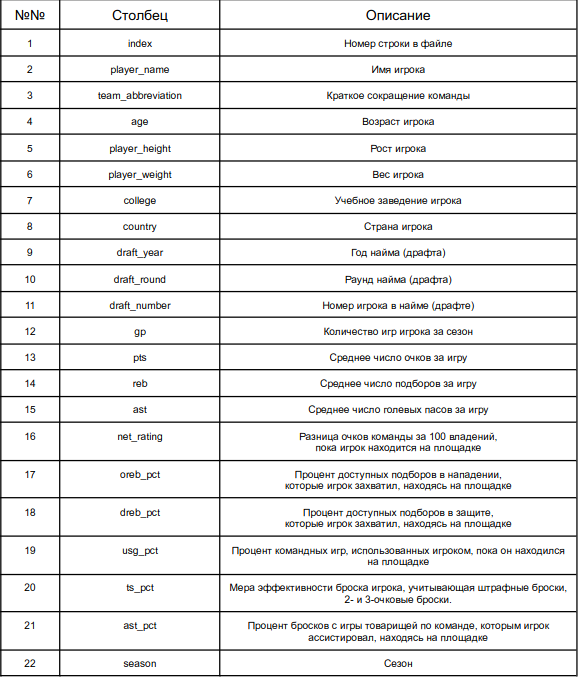

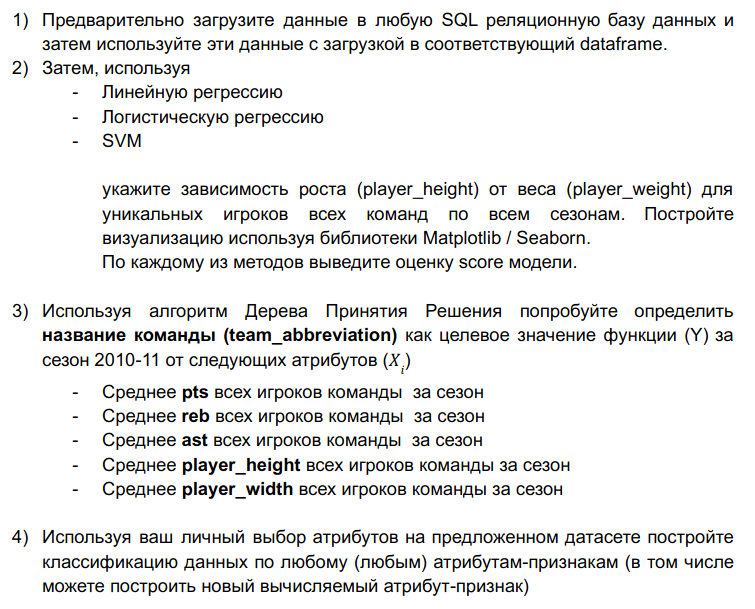

In [1]:
#@title Библиотеки
import numpy as np
import pandas as pd
import seaborn as sns

import sqlite3

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
name_db = 'test.db' # Имя базы данных
name_table = 'table_name' # Имя табицы
path_to_csv = '/content/dataset.csv' # Путь до датасета в формате csv

In [3]:
#@title Переносим csv в sqlite3
DataFrame = pd.read_csv(path_to_csv)
con = sqlite3.connect(name_db)
DataFrame.to_sql(
    name_table,
    con,
    schema=None,
    if_exists='replace'
)
con.close()

In [4]:
#@title Переносим sqlite3 в csv
con = sqlite3.connect(name_db)
df = pd.read_sql(f'SELECT * FROM {name_table}', con)
con.close()
df

,index,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


# EDA

In [ ]:
df.isna().sum()

index                0
Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              12305 non-null  int64  
 1   Unnamed: 0         12305 non-null  int64  
 2   player_name        12305 non-null  object 
 3   team_abbreviation  12305 non-null  object 
 4   age                12305 non-null  float64
 5   player_height      12305 non-null  float64
 6   player_weight      12305 non-null  float64
 7   college            12305 non-null  object 
 8   country            12305 non-null  object 
 9   draft_year         12305 non-null  object 
 10  draft_round        12305 non-null  object 
 11  draft_number       12305 non-null  object 
 12  gp                 12305 non-null  int64  
 13  pts                12305 non-null  float64
 14  reb                12305 non-null  float64
 15  ast                12305 non-null  float64
 16  net_rating         123

In [ ]:
df.describe()

,index,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,6152.000000,6152.000000,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,3552.291866,3552.291866,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,0.000000,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3076.000000,3076.000000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,6152.000000,6152.000000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,9228.000000,9228.000000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,12304.000000,12304.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [ ]:
df.nunique()

index                12305
Unnamed: 0           12305
player_name           2463
team_abbreviation       36
age                     27
player_height           30
player_weight          157
college                347
country                 82
draft_year              47
draft_round              9
draft_number            76
gp                      85
pts                    314
reb                    153
ast                    115
net_rating             757
oreb_pct               216
dreb_pct               352
usg_pct                345
ts_pct                 551
ast_pct                481
season                  26
dtype: int64

# DataCleaning

In [5]:
#@title Удаляем незначащие колонки
try:
  del df['index']
  del df['Unnamed: 0']
except KeyError:
  print('Колонки не найденны')
df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,13,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,6,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [6]:
#@title Удаляем дубликаты если они есть
df = df.drop_duplicates()
df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,13,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,6,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


## Удаление команд с малым количесвтвом записей (для задач классификации команд)

In [7]:
df_test = pd.DataFrame()
df_team_season_count = df[['team_abbreviation', 'season']]
for i in df_team_season_count['season'].unique():
  for j in df_team_season_count['team_abbreviation'].unique():
    test =  df_team_season_count[df_team_season_count['season'] == i]
    df_test.loc[i,j] = len(test[test['team_abbreviation'] == j])
df_test

,CHI,LAC,TOR,DAL,MIA,HOU,LAL,ATL,MIL,DEN,...,UTA,WAS,NYK,MEM,NOH,CHA,NOK,OKC,BKN,NOP
1996-97,15.0,15.0,20.0,17.0,17.0,17.0,14.0,17.0,15.0,17.0,...,12.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-98,15.0,14.0,19.0,16.0,16.0,14.0,13.0,16.0,16.0,15.0,...,13.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998-99,15.0,15.0,15.0,14.0,17.0,15.0,14.0,14.0,15.0,16.0,...,14.0,15.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-00,17.0,17.0,15.0,17.0,16.0,16.0,14.0,13.0,13.0,15.0,...,12.0,16.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01,16.0,14.0,15.0,15.0,16.0,14.0,15.0,16.0,15.0,15.0,...,14.0,15.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-02,13.0,16.0,16.0,17.0,17.0,14.0,14.0,18.0,14.0,17.0,...,14.0,14.0,14.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-03,15.0,15.0,18.0,16.0,14.0,14.0,14.0,20.0,13.0,16.0,...,13.0,16.0,13.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0
2003-04,16.0,16.0,16.0,13.0,17.0,15.0,15.0,16.0,14.0,15.0,...,17.0,15.0,16.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0
2004-05,15.0,17.0,14.0,14.0,15.0,17.0,15.0,17.0,15.0,15.0,...,16.0,16.0,15.0,15.0,18.0,17.0,0.0,0.0,0.0,0.0
2005-06,17.0,16.0,15.0,16.0,17.0,16.0,17.0,13.0,14.0,17.0,...,15.0,14.0,16.0,15.0,0.0,15.0,17.0,0.0,0.0,0.0


In [8]:
df_test.sum()

CHI    406.0
LAC    424.0
TOR    428.0
DAL    422.0
MIA    426.0
HOU    418.0
LAL    411.0
ATL    421.0
MIL    409.0
DEN    412.0
SEA    182.0
POR    407.0
VAN     72.0
NJN    257.0
BOS    407.0
IND    410.0
SAC    398.0
MIN    399.0
PHI    420.0
ORL    411.0
SAS    413.0
PHX    399.0
DET    400.0
CHH     89.0
CLE    433.0
GSW    409.0
UTA    397.0
WAS    422.0
NYK    410.0
MEM    352.0
NOH    143.0
CHA    288.0
NOK     32.0
OKC    239.0
BKN    180.0
NOP    159.0
dtype: float64

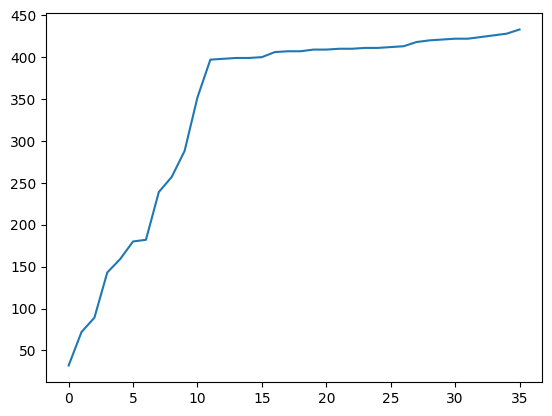

In [9]:
plt.plot(np.sort(df_test.sum()))
# Удаляем записи команд которые меньше 400, так как они мало где участвовали

In [10]:
df_test_sum = df_test.sum()
df_test_sum_column = df_test.columns
arr_del_column = []

for i in range(len(df_test_sum)):
  if df_test_sum[df_test_sum_column[i]] < 400:
    arr_del_column.append(df_test_sum_column[i])
arr_del_column    

['SEA',
 'VAN',
 'NJN',
 'SAC',
 'MIN',
 'PHX',
 'CHH',
 'UTA',
 'MEM',
 'NOH',
 'CHA',
 'NOK',
 'OKC',
 'BKN',
 'NOP']

In [11]:
df_non_column = df
for i in arr_del_column:
  df_non_column = df_non_column.drop(df[df['team_abbreviation'] == i].index)
df_non_column

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,13,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,6,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


## Удаляем выбросы

Будем считать что выбросов нет

# DataPreparation

## Для роста и веса

In [ ]:
df[df['player_name'] == 'Dennis Rodman']

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
728,Dennis Rodman,CHI,37.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986,2,27,...,4.7,15.0,2.9,6.7,0.169,0.319,0.088,0.459,0.112,1997-98
1227,Dennis Rodman,LAL,38.0,200.66,95.25432,Southeastern Oklahoma State,USA,1986,2,27,...,2.1,11.2,1.3,-1.4,0.114,0.348,0.065,0.388,0.063,1998-99
1354,Dennis Rodman,DAL,39.0,200.66,95.25432,Southeastern Oklahoma State,USA,1986,2,27,...,2.8,14.3,1.2,-7.1,0.136,0.351,0.064,0.457,0.046,1999-00


In [ ]:
df_pn_ph_pw = df[['player_name', 'player_height', 'player_weight']]
df_pn_ph_pw

,player_name,player_height,player_weight
0,Dennis Rodman,198.12,99.790240
1,Dwayne Schintzius,215.90,117.933920
2,Earl Cureton,205.74,95.254320
3,Ed O'Bannon,203.20,100.697424
4,Ed Pinckney,205.74,108.862080
...,...,...,...
12300,Markieff Morris,205.74,111.130040
12301,Markelle Fultz,193.04,94.800728
12302,Marcus Smart,193.04,99.790240
12303,Marcus Garrett,195.58,92.986360


In [ ]:
df_pn_ph_pw_unique = df_pn_ph_pw.drop_duplicates()
df_pn_ph_pw_unique

,player_name,player_height,player_weight
0,Dennis Rodman,198.12,99.790240
1,Dwayne Schintzius,215.90,117.933920
2,Earl Cureton,205.74,95.254320
3,Ed O'Bannon,203.20,100.697424
4,Ed Pinckney,205.74,108.862080
...,...,...,...
12291,Matt Ryan,200.66,97.522280
12299,Marko Simonovic,210.82,99.790240
12301,Markelle Fultz,193.04,94.800728
12303,Marcus Garrett,195.58,92.986360


## Для классификации команды

In [12]:
# Поделил 60/20/20 (почти, лишний убрал в train)
train_season = ['1996-97', '1999-00',
       '2002-03', '2005-06',
       '2008-09', '2010-11',
       '2014-15', '2017-18',
       '2020-21', '2019-20',
       '2021-22', '2016-17',
       '2015-16', '2018-19',
       '2001-02', '2012-13'] 

val_season = ['1997-98', '2000-01',
       '2003-04', '2006-07',
       '2009-10']

test_season = ['1998-99', '2004-05',
       '2007-08', '2011-12',
       '2013-14']

list_data = [train_season, 
             val_season, 
             test_season]

In [13]:
list_df_season = [list_df_season_train:=[], 
                    list_df_season_val:=[], 
                    list_df_season_test:=[]]

for i, tvt in enumerate(list_data):
  for season in tvt:
    df_season = df_non_column[df_non_column['season'] == season]
    df_season_groupby = df_season['team_abbreviation']
    list_df_season[i].append(df_season_groupby)

df_team_train = pd.concat(list_df_season_train)
df_team_val = pd.concat(list_df_season_val)
df_team_test = pd.concat(list_df_season_test)

# находим уникальные значения между двумя датафреймами
unique_values = np.setdiff1d(df_team_val, df_team_train)
# выводим команды которые не попали в тренировочную выборку, но попали в валидационную
print(unique_values)

unique_values = np.setdiff1d(df_team_test, df_team_train)
# выводим команды которые не попали в тренировочную выборку, но попали в тестовую
print(unique_values)

[]
[]


In [296]:
#@title Проверка на пересекаемость выборок (пересекаймости нет)
sum = 0
list_df_season = [list_df_season_train:=[], 
                  list_df_season_val:=[], 
                  list_df_season_test:=[]]


for i, tvt in enumerate(list_data):
  for season in tvt:
    list_df_season[i].append(df_non_column[df_non_column['season'] == season])
  for j in range(len(list_data[i])):
    sum += len(list_df_season[i][j]) 


print(sum)

8719


In [16]:
#@title Метод для реализации дерева решений

def DT(df: DataFrame, list_data: list, normalize: bool = True, group: bool = True):
  '''
  Обработка данных для работы с решающим деревом
  '''
  list_df_season = [list_df_season_train:=[], 
                    list_df_season_val:=[], 
                    list_df_season_test:=[]]

  for i, tvt in enumerate(list_data):
    for season in tvt:
      df_season = df[df['season'] == season]
      if group:
        df_season_groupby = df_season.groupby('team_abbreviation')[['pts', 'reb', 'ast', 'player_height', 'player_weight']].mean()
      else:
        df_season_groupby = df_season[['pts', 'reb', 'ast', 'player_height', 'player_weight']].set_index(df_season['team_abbreviation'])  
      if normalize:
        df_season_groupby_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df_season_groupby), columns=df_season_groupby.columns).set_index(df_season_groupby.index)
        list_df_season[i].append(df_season_groupby_normalized)
      else:
        list_df_season[i].append(df_season_groupby)

  df_team_train = pd.concat(list_df_season_train)
  df_team_val = pd.concat(list_df_season_val)
  df_team_test = pd.concat(list_df_season_test)

  return df_team_train, df_team_val, df_team_test

In [17]:
#@title Создание набора данных без масштабирования, не группированные, на всем датасете
df_team_train, df_team_val, df_team_test = DT(df, list_data, False, False)

In [18]:
#@title Создание набора данных с масштабированием, не группированные, на всем датасете
df_team_norm_train, df_team_norm_val, df_team_norm_test = DT(df, list_data, group=False)

In [19]:
#@title Создание набора данных без масштабирования, группированные, на всем датасете
df_team_group_train, df_team_group_val, df_team_group_test = DT(df, list_data, False)

In [20]:
#@title Создание набора данных с масштабированием, группированные, на всем датасете
df_team_norm_group_train, df_team_norm_group_val, df_team_norm_group_test = DT(df, list_data)

In [21]:
#@title Создание набора данных без масштабирования, не группированные, на датасете с большим количеством записей у команд
df_team_col_train, df_team_col_val, df_team_col_test = DT(df_non_column, list_data, False, False)

In [22]:
#@title Создание набора данных c масштабирования, не группированные, на датасете с большим количеством записей у команд
df_team_norm_col_train, df_team_norm_col_val, df_team_norm_col_test = DT(df_non_column, list_data, True, False)

In [23]:
#@title Создание набора данных без масштабирования, группированные, на датасете с большим количеством записей у команд
df_team_group_col_train, df_team_group_col_val, df_team_group_col_test = DT(df_non_column, list_data, False)

In [24]:
#@title Создание набора данных c масштабирования, группированные, на датасете с большим количеством записей у команд
df_team_norm_group_col_train, df_team_norm_group_col_val, df_team_norm_group_col_test = DT(df_non_column, list_data)

In [25]:
list_df_team_dt_train = [df_team_train, df_team_norm_train, df_team_group_train, df_team_norm_group_train, df_team_col_train, df_team_norm_col_train, df_team_group_col_train, df_team_norm_group_col_train] 
list_df_team_dt_val = [df_team_val, df_team_norm_val, df_team_group_val, df_team_norm_group_val, df_team_col_val, df_team_norm_col_val, df_team_group_col_val, df_team_norm_group_col_val] 
list_df_team_dt_test = [df_team_test, df_team_norm_test, df_team_group_test, df_team_norm_group_test, df_team_col_test, df_team_norm_col_test, df_team_group_col_test, df_team_norm_group_col_test] 

In [ ]:
df_team_train.index.unique()

Index(['ATL', 'BOS', 'CHH', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU',
       'IND', 'LAC', 'LAL', 'MIA', 'MIL', 'MIN', 'NJN', 'NYK', 'ORL', 'PHI',
       'PHX', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'VAN', 'WAS', 'MEM',
       'NOH', 'CHA', 'NOK', 'OKC', 'BKN', 'NOP'],
      dtype='object', name='team_abbreviation')

In [ ]:
df_team_val.index.unique()

Index(['ATL', 'BOS', 'CHH', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU',
       'IND', 'LAC', 'LAL', 'MIA', 'MIL', 'MIN', 'NJN', 'NYK', 'ORL', 'PHI',
       'PHX', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'VAN', 'WAS', 'MEM',
       'NOH', 'CHA', 'NOK', 'OKC'],
      dtype='object', name='team_abbreviation')

In [ ]:
df_team_test.index.unique()

Index(['ATL', 'BOS', 'CHH', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU',
       'IND', 'LAC', 'LAL', 'MIA', 'MIL', 'MIN', 'NJN', 'NYK', 'ORL', 'PHI',
       'PHX', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'VAN', 'WAS', 'CHA',
       'MEM', 'NOH', 'OKC', 'BKN', 'NOP'],
      dtype='object', name='team_abbreviation')

In [306]:
df_team_norm_train

,age,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,player_height,player_weight
team_abbreviation,,,,,,,,,,,,,
CHI,0.720000,0.658537,0.192568,1.000000,0.271930,0.365587,0.744,0.452381,0.293255,0.599499,0.243534,0.535714,0.391089
LAC,0.400000,0.170732,0.077703,0.093168,0.026316,0.357095,0.312,0.211485,0.513196,0.538173,0.103448,0.785714,0.589109
TOR,0.840000,0.097561,0.027027,0.062112,0.035088,0.324916,0.420,0.142857,0.302053,0.470588,0.318966,0.642857,0.341584
DAL,0.240000,0.768293,0.125000,0.142857,0.052632,0.310168,0.240,0.208683,0.489736,0.499374,0.165948,0.607143,0.400990
MIA,0.640000,0.317073,0.081081,0.149068,0.017544,0.304581,0.436,0.250700,0.372434,0.764706,0.086207,0.642857,0.490099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
BKN,0.619048,0.876543,0.567944,0.208333,0.315315,0.788244,0.048,0.148000,0.595109,0.559613,0.271667,0.555556,0.589552
MIA,0.523810,0.753086,0.048780,0.131944,0.018018,0.793519,0.192,0.282000,0.236413,0.582170,0.056667,0.666667,0.626866
POR,0.333333,0.617284,0.090592,0.159722,0.027027,0.662396,0.176,0.380000,0.448370,0.467240,0.083333,0.722222,0.477612


## Классификация команды игрока по доп атрибутам (свой вариант)

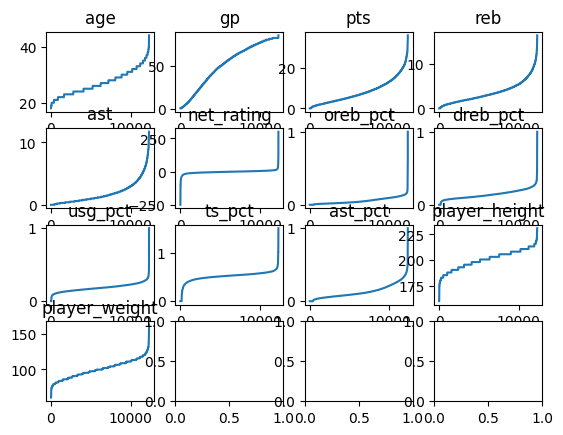

In [258]:
#@title Отображения отсортированных выбранных атрибутов для понимания данных
from matplotlib.gridspec import GridSpec

# Создаем сетку для макета графика
gs = GridSpec(4, 4)


ax = []
for i in range(4):
  for j in range(4):
    ax.append(plt.subplot(gs[i, j]))

# Рисуем графики
for j, i in enumerate(['age', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'player_height', 'player_weight']):
  ax[j].plot(np.sort(df[i]))
  ax[j].set_title(i)

# Отображаем графики
plt.show()

Некоторый код используется из предыдушего блока

In [28]:
#@title Метод для реализации дерева решений

def DT_add(df: DataFrame, list_data: list, normalize: bool = True, group: bool = True):
  '''
  Обработка данных для работы с решающим деревом
  '''
  list_df_season = [list_df_season_train:=[], 
                    list_df_season_val:=[], 
                    list_df_season_test:=[]]

  for i, tvt in enumerate(list_data):
    for season in tvt:
      df_season = df[df['season'] == season]
      if group:
        df_season_groupby = df_season.groupby('team_abbreviation')[['age','gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'player_height', 'player_weight']].mean()
      else:
        df_season_groupby = df_season[['age','gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'player_height', 'player_weight']].set_index(df_season['team_abbreviation'])  
      if normalize:
        df_season_groupby_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df_season_groupby), columns=df_season_groupby.columns).set_index(df_season_groupby.index)
        list_df_season[i].append(df_season_groupby_normalized)
      else:
        list_df_season[i].append(df_season_groupby)

  df_team_train = pd.concat(list_df_season_train)
  df_team_val = pd.concat(list_df_season_val)
  df_team_test = pd.concat(list_df_season_test)

  return df_team_train, df_team_val, df_team_test

In [29]:
#@title Создание набора данных без масштабирования, не группированные, на всем датасете
df_add_team_train, df_add_team_val, df_add_team_test = DT_add(df, list_data, False, False)

In [30]:
#@title Создание набора данных с масштабированием, не группированные, на всем датасете
df_add_team_norm_train, df_add_team_norm_val, df_add_team_norm_test = DT_add(df, list_data, group=False)

In [31]:
#@title Создание набора данных без масштабирования, группированные, на всем датасете
df_add_team_group_train, df_add_team_group_val, df_add_team_group_test = DT_add(df, list_data, False)

In [32]:
#@title Создание набора данных с масштабированием, группированные, на всем датасете
df_add_team_norm_group_train, df_add_team_norm_group_val, df_add_team_norm_group_test = DT_add(df, list_data)

In [33]:
#@title Создание набора данных без масштабирования, не группированные, на датасете с большим количеством записей у команд
df_add_team_col_train, df_add_team_col_val, df_add_team_col_test = DT_add(df_non_column, list_data, False, False)

In [34]:
#@title Создание набора данных c масштабирования, не группированные, на датасете с большим количеством записей у команд
df_add_team_norm_col_train, df_add_team_norm_col_val, df_add_team_norm_col_test = DT_add(df_non_column, list_data, True, False)

In [35]:
#@title Создание набора данных без масштабирования, группированные, на датасете с большим количеством записей у команд
df_add_team_group_col_train, df_add_team_group_col_val, df_add_team_group_col_test = DT_add(df_non_column, list_data, False)

In [36]:
#@title Создание набора данных c масштабирования, группированные, на датасете с большим количеством записей у команд
df_add_team_norm_group_col_train, df_add_team_norm_group_col_val, df_add_team_norm_group_col_test = DT_add(df_non_column, list_data)

In [37]:
list_df_add_team_dt_train = [df_add_team_train, df_add_team_norm_train, df_add_team_group_train, df_add_team_norm_group_train, df_add_team_col_train, df_add_team_norm_col_train, df_add_team_group_col_train, df_add_team_norm_group_col_train] 
list_df_add_team_dt_val = [df_add_team_val, df_add_team_norm_val, df_add_team_group_val, df_add_team_norm_group_val, df_add_team_col_val, df_add_team_norm_col_val, df_add_team_group_col_val, df_add_team_norm_group_col_val] 
list_df_add_team_dt_test = [df_add_team_test, df_add_team_norm_test, df_add_team_group_test, df_add_team_norm_group_test, df_add_team_col_test, df_add_team_norm_col_test, df_add_team_group_col_test, df_add_team_norm_group_col_test] 

# Models

## Линейная регрессия для роста и веса

In [ ]:
#@title Метод для реализации линейной регрессии
def LR(x_axis: DataFrame, y_axis: DataFrame, print_shape: bool = True):
  '''
  В метод передаются два датафрейма 
  одинаковой размерности
  и каждый со своей одной фичей

  Параметр print_shape отвечает за отображение
  размерности разделенных датафреймов

  Данный метод делит данные
  в отношении 80/20,
  обучает линейную регрессию
  и выводит график регрессии,
  а также полученную точность на тестовых данных
  '''

  # Делим данные по закону Паретто в соотношении 80 к 20
  X_train, X_test, y_train, y_test = train_test_split(x_axis,y_axis,test_size = 0.20)

  if print_shape:
    print('X_train:', np.shape(X_train))
    print('y_train:', np.shape(y_train))

    print('X_test:', np.shape(X_test))
    print('y_test:', np.shape(y_test))

  # проводим инициализацию модели
  model=LinearRegression()
  model.fit(X_train, y_train)
  
  # строим график
  plt.scatter(x_axis, y_axis, alpha=0.5)
  plt.plot(x_axis, model.predict(x_axis), color='red')

  # Названия осей
  plt.xlabel(x_axis.columns[0])
  plt.ylabel(y_axis.columns[0])
  plt.title(f'score: {model.score(X_test,y_test)}')
  plt.show()

### С повторами

X_train: (9844, 1)
y_train: (9844, 1)
X_test: (2461, 1)
y_test: (2461, 1)


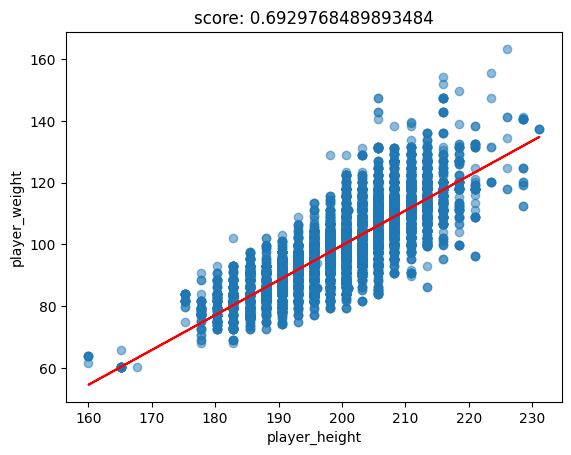

In [ ]:
LR(df_pn_ph_pw[['player_height']],
   df_pn_ph_pw[['player_weight']])

### Без повторов

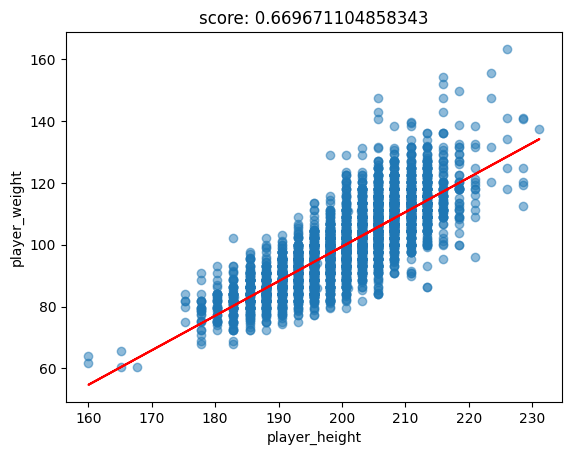

In [ ]:
LR(df_pn_ph_pw_unique[['player_height']],
   df_pn_ph_pw_unique[['player_weight']],
   print_shape = False)

## Метод опорных векторов для роста и веса

In [ ]:
#@title Метод для реализации метода опорных векторов
def SVM(x_axis: DataFrame, y_axis: DataFrame, print_shape: bool = True):
  '''
  В метод передаются два датафрейма 
  одинаковой размерности
  и каждый со своей одной фичей

  Параметр print_shape отвечает за отображение
  размерности разделенных датафреймов

  Данный метод делит данные
  в отношении 80/20,
  обучает метод опорных векторов для задачи регрессии
  и выводит график регрессии,
  а также полученную точность на тестовых данных
  '''

  # Делим данные по закону Паретто в соотношении 80 к 20
  X_train, X_test, y_train, y_test = train_test_split(x_axis,y_axis,test_size = 0.20)


  if print_shape:
    print('X_train:', np.shape(X_train))
    print('y_train:', np.shape(y_train))

    print('X_test:', np.shape(X_test))
    print('y_test:', np.shape(y_test))


  for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    model_svm = SVR(kernel=i)
    model_svm.fit(X_train, np.ravel(y_train))

    # строим график
    plt.scatter(x_axis, y_axis, alpha=0.5)
    plt.plot(x_axis, model_svm.predict(x_axis), color='red')

    # Названия осей
    plt.xlabel(x_axis.columns[0])
    plt.ylabel(y_axis.columns[0])
    plt.title(f'{i} score: {model_svm.score(X_test,y_test)}')
    plt.show()

### С повторами

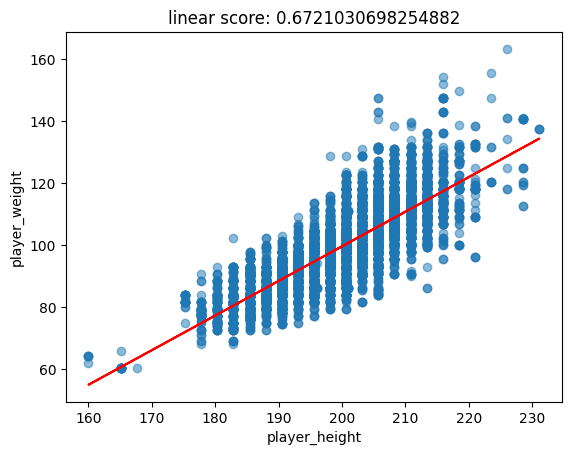

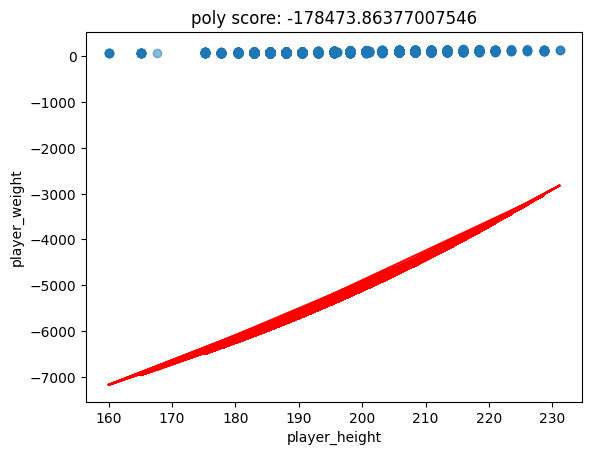

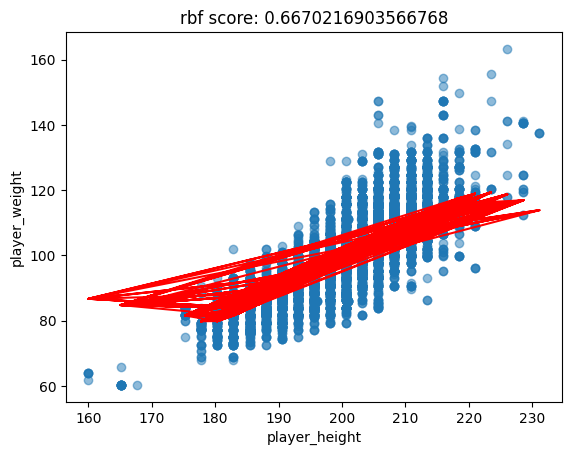

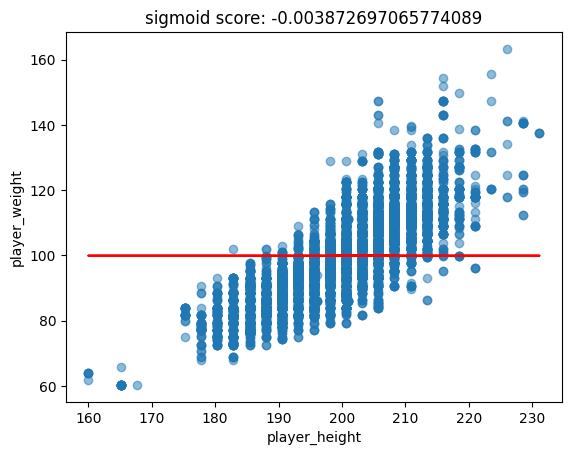

In [ ]:
SVM(df_pn_ph_pw[['player_height']],
   df_pn_ph_pw[['player_weight']],
   print_shape = False)

### Без повторов

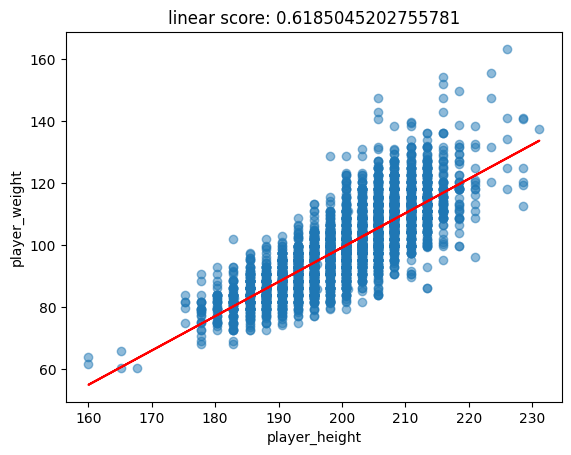

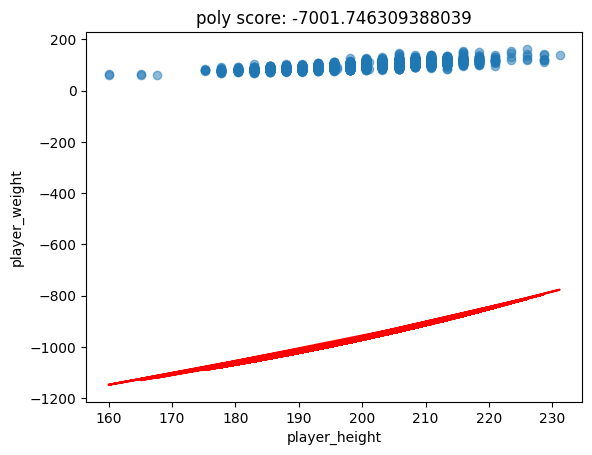

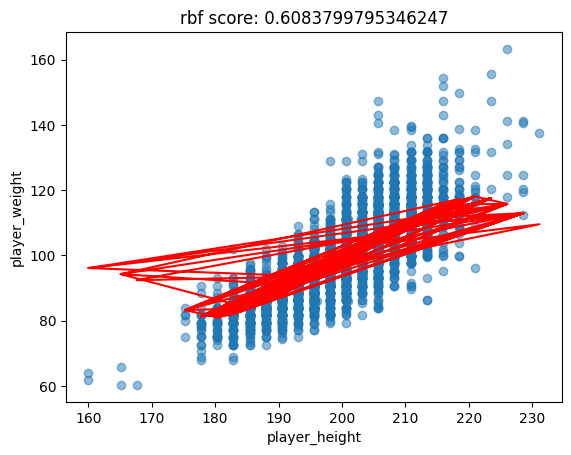

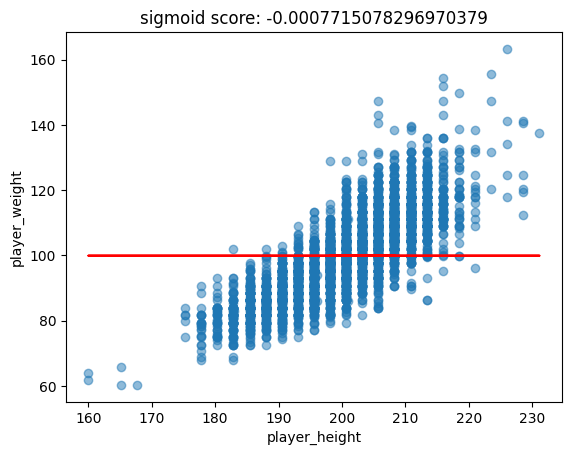

In [ ]:
SVM(df_pn_ph_pw_unique[['player_height']],
   df_pn_ph_pw_unique[['player_weight']],
   print_shape = False)

## Дерево

In [200]:
#@title Метод для реализации решающего дерева
def Decision_Tree(df_team_train: DataFrame, df_team_val: DataFrame):
  for i in ['gini', 'entropy', 'log_loss']:
    list_train_score = []
    list_val_score = []
    for j in range(1, 11):
      dt_classifier = DecisionTreeClassifier(criterion = i, max_depth=j)
      dt_classifier.fit(df_team_train, np.array(df_team_train.index))

      train_score = dt_classifier.score(df_team_train, np.array(df_team_train.index))
      val_score = dt_classifier.score(df_team_val, df_team_val.index)

      list_train_score.append(train_score)
      list_val_score.append(val_score)

    # создаем область вывода
    fig, ax = plt.subplots()

    # строим первый график
    ax.plot(range(1, 11), list_train_score, color='red', label='тренеровочные данные')

    # строим второй график
    ax.plot(range(1, 11), list_val_score, color='blue', label='валидиционные данные')

    # добавляем заголовок и метки осей
    ax.set_title(f'max score на val данных для {i}: {max(list_val_score)}')
    ax.set_xlabel('max_depth')
    ax.set_ylabel('score')

    # добавляем легенду
    ax.legend()

    # показываем график
    plt.show()

In [26]:
dt = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

grid_search = GridSearchCV(dt, param_grid, cv=None)
for j, i in enumerate(list_df_team_dt_train):
  grid_search.fit(i, i.index)

  best_dt = grid_search.best_estimator_

  print("Best parameters: ", grid_search.best_params_)
  print("Train accuracy: ", best_dt.score(i, i.index))
  print("Validation accuracy: ", best_dt.score(list_df_team_dt_val[j], list_df_team_dt_val[j].index))
  print("Test accuracy: ", best_dt.score(list_df_team_dt_test[j], list_df_team_dt_test[j].index))

Best parameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'splitter': 'best'}
Train accuracy:  0.36002059467112885
Validation accuracy:  0.10216021602160216
Test accuracy:  0.10285220397579949
Best parameters:  {'criterion': 'log_loss', 'max_depth': 15, 'min_samples_leaf': 2, 'splitter': 'best'}
Train accuracy:  0.2840777448835114
Validation accuracy:  0.0594059405940594
Test accuracy:  0.05661192739844425


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'splitter': 'random'}
Train accuracy:  0.15966386554621848
Validation accuracy:  0.04081632653061224
Test accuracy:  0.053691275167785234


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 9, 'splitter': 'random'}
Train accuracy:  0.11974789915966387
Validation accuracy:  0.06802721088435375
Test accuracy:  0.06040268456375839
Best parameters:  {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 2, 'splitter': 'random'}
Train accuracy:  0.25136512559155444
Validation accuracy:  0.10667498440424204
Test accuracy:  0.10110974106041924
Best parameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'splitter': 'random'}
Train accuracy:  0.35966508918820533
Validation accuracy:  0.08359326263256395
Test accuracy:  0.08076448828606658
Best parameters:  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 2, 'splitter': 'random'}
Train accuracy:  0.5208333333333334
Validation accuracy:  0.0761904761904762
Test accuracy:  0.08571428571428572
Best parameters:  {'criterion': 'log_loss', 'max_depth': 7, 'min_samples_leaf': 8, 'splitter': 'random'}
Train accuracy:  0.22

# Свой вариант

In [ ]:
#@title Метод для реализации решающего дерева (покаывае как расходяся очноси на раных данных)
def Decision_Tree(df_team_train: DataFrame, df_team_val: DataFrame):
  for i in ['gini', 'entropy', 'log_loss']:
    list_train_score = []
    list_val_score = []
    depth = 20
    for j in range(1, depth):
      dt_classifier = DecisionTreeClassifier(criterion = i, max_depth=j)
      dt_classifier.fit(df_team_train, np.array(df_team_train.index))

      train_score = dt_classifier.score(df_team_train, np.array(df_team_train.index))
      val_score = dt_classifier.score(df_team_val, df_team_val.index)

      list_train_score.append(train_score)
      list_val_score.append(val_score)

    # создаем область вывода
    fig, ax = plt.subplots()

    # строим первый график
    ax.plot(range(1, depth), list_train_score, color='red', label='тренеровочные данные')

    # строим второй график
    ax.plot(range(1, depth), list_val_score, color='blue', label='валидиционные данные')

    # добавляем заголовок и метки осей
    ax.set_title(f'max score на val данных для {i}: {max(list_val_score)}')
    ax.set_xlabel('max_depth')
    ax.set_ylabel('score')

    # добавляем легенду
    ax.legend()

    # показываем график
    plt.show()

In [46]:
dt = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

grid_search = GridSearchCV(dt, param_grid, cv=None)
for j, i in enumerate(list_df_add_team_dt_train):
  grid_search.fit(i, i.index)

  best_dt = grid_search.best_estimator_

  print("Best parameters: ", grid_search.best_params_)
  print("Train accuracy: ", best_dt.score(i, i.index))
  print("Validation accuracy: ", best_dt.score(list_df_add_team_dt_val[j], list_df_add_team_dt_val[j].index))
  print("Test accuracy: ", best_dt.score(list_df_add_team_dt_test[j], list_df_add_team_dt_test[j].index))

Best parameters:  {'criterion': 'log_loss', 'max_depth': 15, 'min_samples_leaf': 6, 'splitter': 'random'}
Train accuracy:  0.23992791865104904
Validation accuracy:  0.04275427542754275
Test accuracy:  0.05056179775280899
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'splitter': 'random'}
Train accuracy:  0.12742952760973097
Validation accuracy:  0.0423042304230423
Test accuracy:  0.04278305963699222


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'splitter': 'best'}
Train accuracy:  0.28781512605042014
Validation accuracy:  0.047619047619047616
Test accuracy:  0.053691275167785234


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 14, 'splitter': 'random'}
Train accuracy:  0.15336134453781514
Validation accuracy:  0.06802721088435375
Test accuracy:  0.040268456375838924
Best parameters:  {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 2, 'splitter': 'random'}
Train accuracy:  0.21896614488532945
Validation accuracy:  0.07111665626949469
Test accuracy:  0.07644882860665844
Best parameters:  {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 3, 'splitter': 'random'}
Train accuracy:  0.262650163815071
Validation accuracy:  0.066126013724267
Test accuracy:  0.05672009864364982
Best parameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'splitter': 'random'}
Train accuracy:  0.32142857142857145
Validation accuracy:  0.05714285714285714
Test accuracy:  0.06666666666666667
Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'splitter': 'random'}
Train accuracy:  0.181547619

# Ensemble

In [49]:
from sklearn.ensemble import BaggingClassifier
# подключаем метрики accuracy
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2)
bc = BaggingClassifier(estimator=dt, random_state=1)
param_grid = {'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65]}


grid_search = GridSearchCV(bc, param_grid, cv=2)

grid_search.fit(df_team_train, df_team_train.index)

best_dt = grid_search.best_estimator_

print("Best parameters: ", grid_search.best_params_)
print("Train accuracy: ", best_dt.score(df_team_train, df_team_train.index))
print("Validation accuracy: ", best_dt.score(df_team_val, df_team_val.index))
print("Test accuracy: ", best_dt.score(df_team_test, df_team_test.index))




# # bc.fit(df_team_train, df_team_train.index)
# y_pred_val = bc.predict(df_team_val)

# acc_val = accuracy_score(df_team_val.index, y_pred_val)
# print('val',acc_val)

# y_pred_test = bc.predict(df_team_test)

# acc_test = accuracy_score(df_team_test.index, y_pred_test)
# print('test',acc_test)

Best parameters:  {'n_estimators': 57}
Train accuracy:  0.9772171450637147
Validation accuracy:  0.17371737173717372
Test accuracy:  0.17156439066551427


In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2)
abc =AdaBoostClassifier(estimator=dt, random_state=1)
param_grid = {'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65]}


grid_search = GridSearchCV(abc, param_grid, cv=2)

grid_search.fit(df_team_train, df_team_train.index)

best_dt = grid_search.best_estimator_

print("Best parameters: ", grid_search.best_params_)
print("Train accuracy: ", best_dt.score(df_team_train, df_team_train.index))
print("Validation accuracy: ", best_dt.score(df_team_val, df_team_val.index))
print("Test accuracy: ", best_dt.score(df_team_test, df_team_test.index))

Best parameters:  {'n_estimators': 61}
Train accuracy:  0.9996138499163342
Validation accuracy:  0.14086408640864087
Test accuracy:  0.1495246326707001


In [58]:
from sklearn.ensemble import GradientBoostingClassifier



t = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2)
clf_gb = GradientBoostingClassifier(learning_rate=0.1, random_state=1)
param_grid = {
    'n_estimators': [50,51,52,53,54,55,56,57,58,59,60]
    ,'max_depth': [2,3,4,5,6,7,8,9,10]
              }


grid_search = GridSearchCV(clf_gb, param_grid, cv=2)

grid_search.fit(df_team_train, df_team_train.index)

best_dt = grid_search.best_estimator_

print("Best parameters: ", grid_search.best_params_)
print("Train accuracy: ", best_dt.score(df_team_train, df_team_train.index))
print("Validation accuracy: ", best_dt.score(df_team_val, df_team_val.index))
print("Test accuracy: ", best_dt.score(df_team_test, df_team_test.index))

Best parameters:  {'max_depth': 10, 'n_estimators': 60}
Train accuracy:  0.9996138499163342
Validation accuracy:  0.11791179117911792
Test accuracy:  0.12878133102852204
